In [1]:
import os
import cv2
import csv
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Setup Directory Path for Main Folder and images

## Main Folder

In [3]:
data_dir = '../input/gtsrb-german-traffic-sign'


## Training Folder

In [4]:
train_path = '../input/gtsrb-german-traffic-sign/Train'

## Test Folder

In [5]:
test_path = '../input/gtsrb-german-traffic-sign/'

## Dictionary of Class Labels for Image Viewing

In [6]:
class_labels = { 0:'Speed limit (20km/h)', 1:'Speed limit (30km/h)', 2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 4:'Speed limit (70km/h)', 5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 7:'Speed limit (100km/h)', 8:'Speed limit (120km/h)', 9:'No passing', 
            10:'No passing veh over 3.5 tons', 11:'Right-of-way at intersection', 12:'Priority road', 13:'Yield', 
            14:'Stop', 15:'No vehicles', 16:'Veh > 3.5 tons prohibited', 17:'No entry', 
            18:'General caution', 19:'Dangerous curve left', 20:'Dangerous curve right', 
            21:'Double curve', 22:'Bumpy road', 23:'Slippery road', 24:'Road narrows on the right', 
            25:'Road work', 26:'Traffic signals', 27:'Pedestrians', 28:'Children crossing', 
            29:'Bicycles crossing', 30:'Beware of ice/snow', 31:'Wild animals crossing', 
            32:'End speed + passing limits', 33:'Turn right ahead', 34:'Turn left ahead', 
            35:'Ahead only', 36:'Go straight or right', 37:'Go straight or left', 38:'Keep right', 
            39:'Keep left', 40:'Roundabout mandatory', 41:'End of no passing', 42:'End no passing veh > 3.5 tons'}

###  Number of Classes

In [23]:
num_classes = len(os.listdir(train_path)) - 1
num_classes

43

# All Classes 

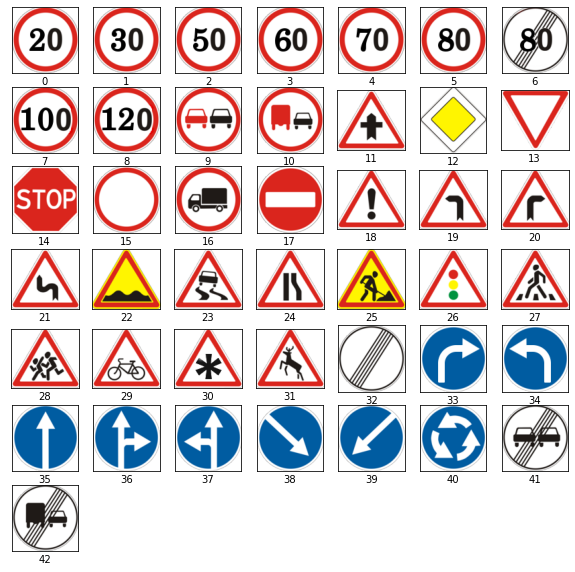

In [9]:
plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = data_dir + "/meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(i)

## Attach Directory to Image Features

In [11]:
trainDf = pd.read_csv('Train.csv')
testDf = pd.read_csv('Test.csv')
metaDf = pd.read_csv('Meta.csv')

In [13]:
trainDf['Path'] = list(map(lambda x: os.path.join(data_dir,x.lower()), trainDf['Path']))
testDf['Path'] = list(map(lambda x: os.path.join(data_dir,x.lower()), testDf['Path']))
metaDf['Path'] = list(map(lambda x: os.path.join(data_dir,x.lower()), metaDf['Path']))

In [14]:
testDf.sample(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
6612,260,225,22,19,237,205,27,../input/gtsrb-german-traffic-sign/test/06612.png
7706,41,45,6,6,36,40,35,../input/gtsrb-german-traffic-sign/test/07706.png
4826,63,63,5,6,58,58,2,../input/gtsrb-german-traffic-sign/test/04826.png
6142,56,59,5,5,51,54,38,../input/gtsrb-german-traffic-sign/test/06142.png
6049,32,32,5,5,26,26,12,../input/gtsrb-german-traffic-sign/test/06049.png


## Data with Labels

In [16]:
labels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for tracks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for track', 'Brock',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for track']

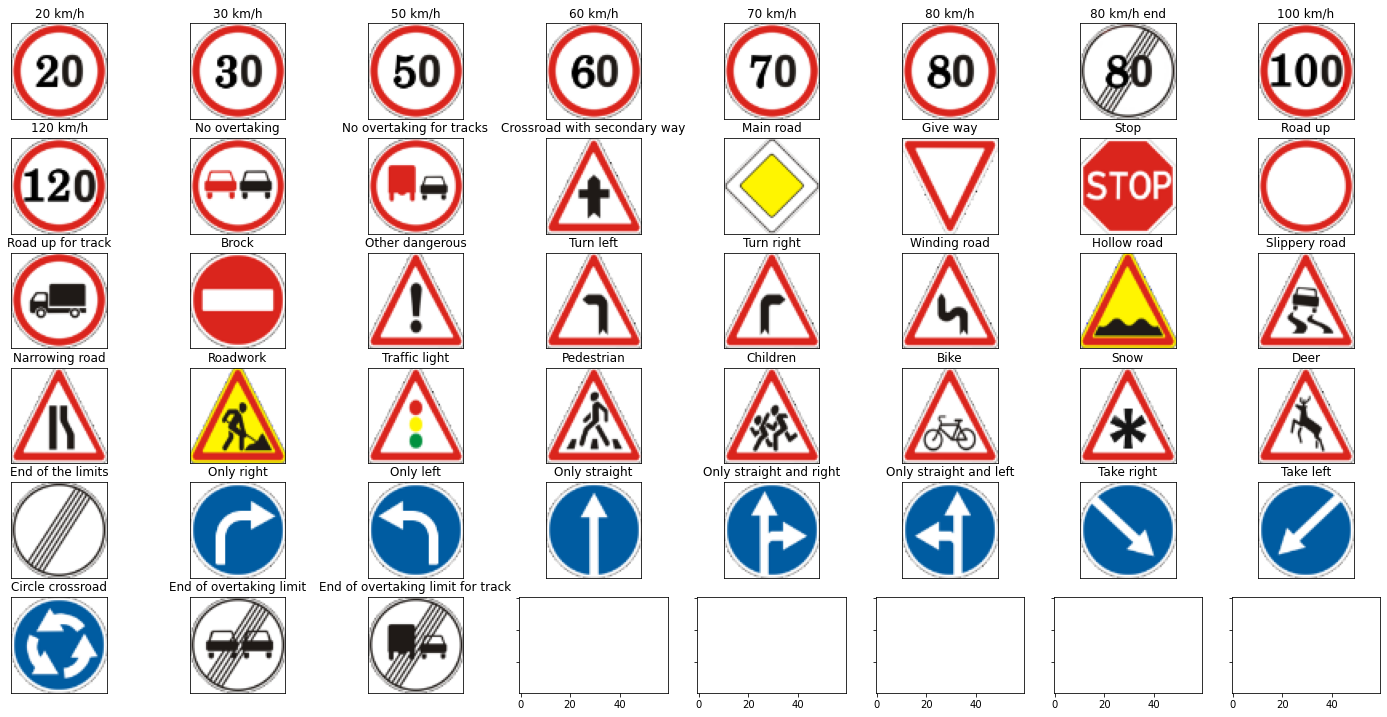

In [17]:
sns.set_style()
rows = 6
cols = 8
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None)
metaDf = metaDf.sort_values(by=['ClassId'])

idx = 0
for i in range(rows):
    for j in range(cols):
        if idx > 42:
            break
            
        img = cv2.imread(metaDf["Path"].tolist()[idx], cv2.IMREAD_UNCHANGED)
        img[np.where(img[:,:,3]==0)] = [255,255,255,255]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (60,60))
        
        axs[i,j].imshow(img)
        axs[i,j].set_facecolor('xkcd:salmon')
        axs[i,j].set_facecolor((1.0, 0.47, 0.42))
        axs[i,j].set_title(labels[int(metaDf["ClassId"].tolist()[idx])])
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        idx += 1

# Actual Data image samples

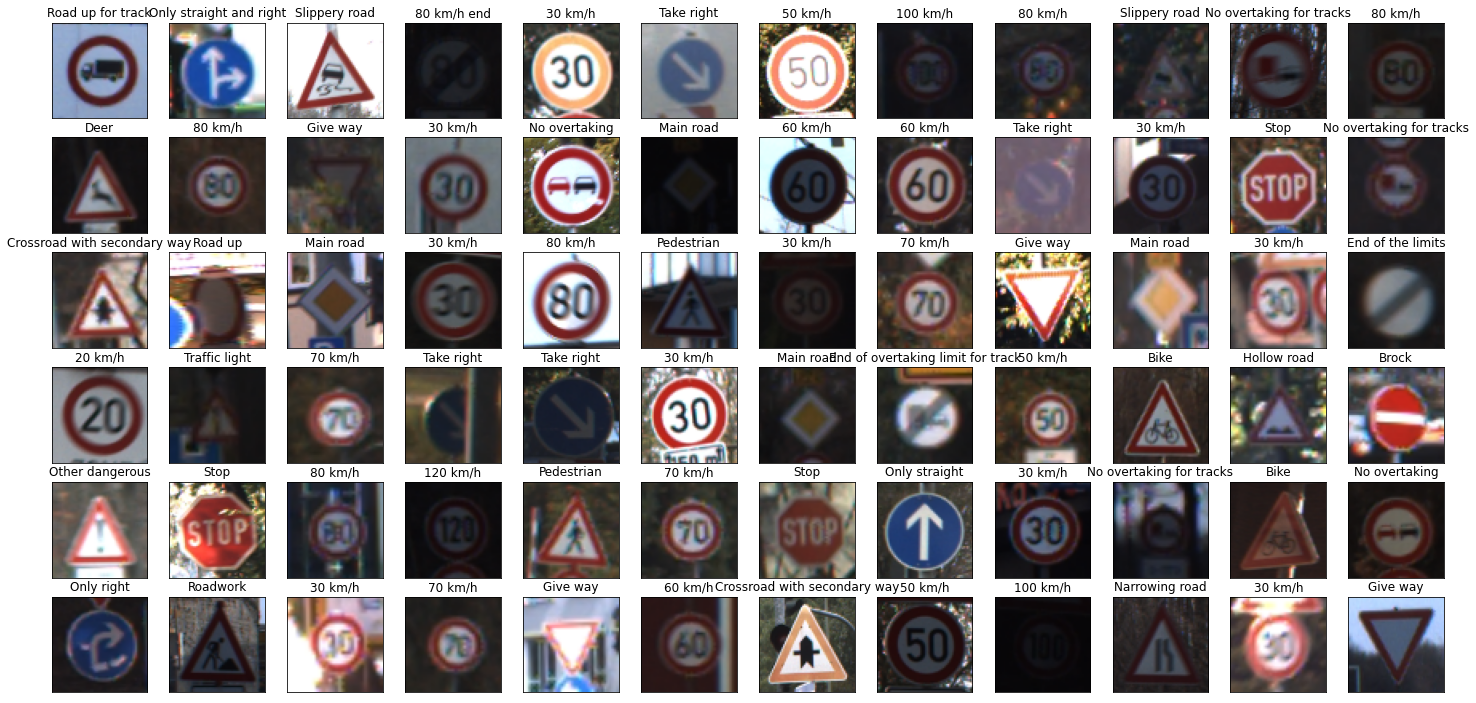

In [16]:
rows = 6
cols = 8+4
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None)
visualize = trainDf.sample(rows*cols)

idx = 0
for i in range(rows):
    for j in range(cols):
        img = cv2.imread(visualize["Path"].tolist()[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (60,60))
        axs[i,j].imshow(img)
        axs[i,j].set_title(labels[int(visualize["ClassId"].tolist()[idx])])
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        idx += 1

# More Actual Data image samples

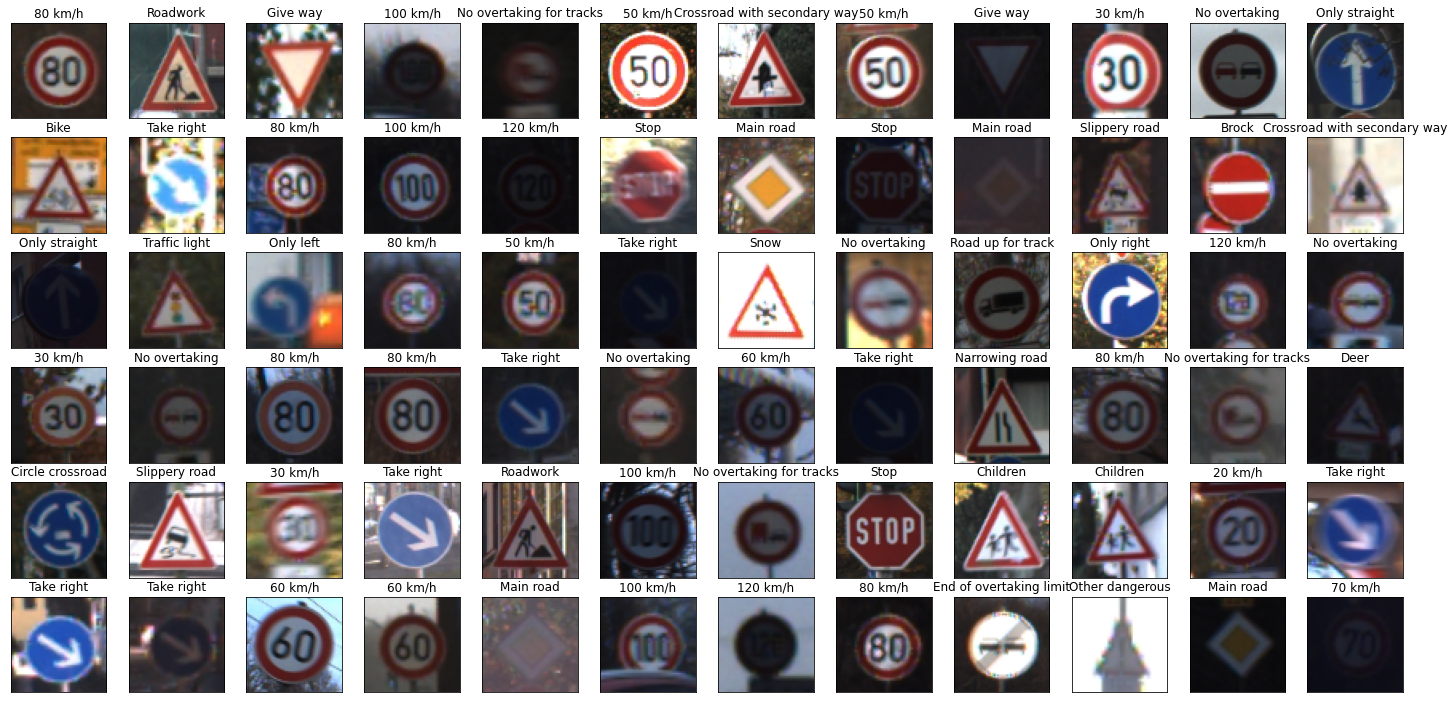

In [17]:
rows = 6
cols = 8+4
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None)
visualize = testDf.sample(rows*cols)

idx = 0
for i in range(rows):
    for j in range(cols):
        img = cv2.imread(visualize["Path"].tolist()[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (60,60))
        axs[i,j].imshow(img)
        axs[i,j].set_title(labels[int(visualize["ClassId"].tolist()[idx])])
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        idx += 1

## View Amount of Images per Class for Training Dataset

/Users/stay_one/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


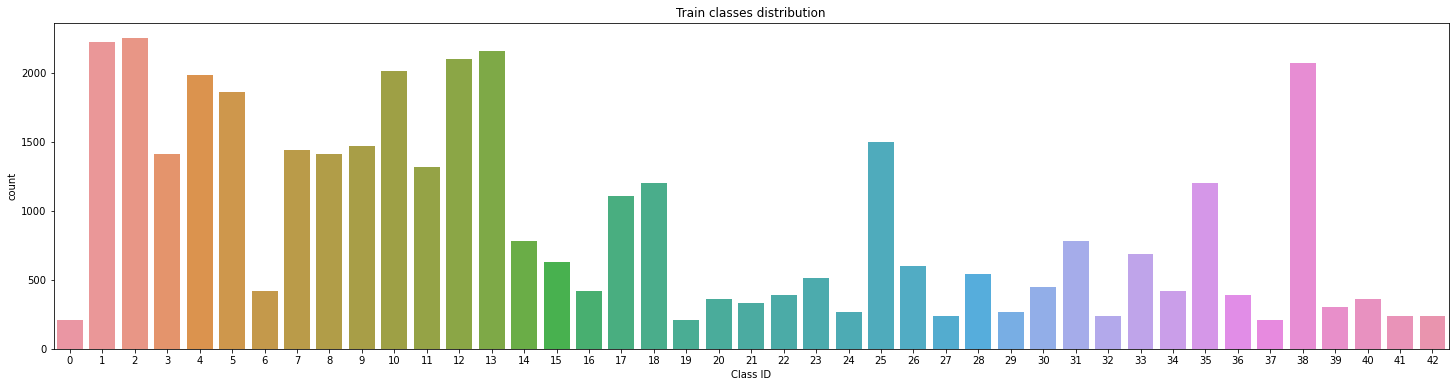

In [20]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(25, 6))
axs.set_title('Train classes distribution')
axs.set_xlabel('Class')
axs.set_ylabel('Count')
sns.countplot(trainDf.ClassId)
axs.set_xlabel('Class ID');


## View Amount of Images per Class for Test Dataset

/Users/stay_one/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


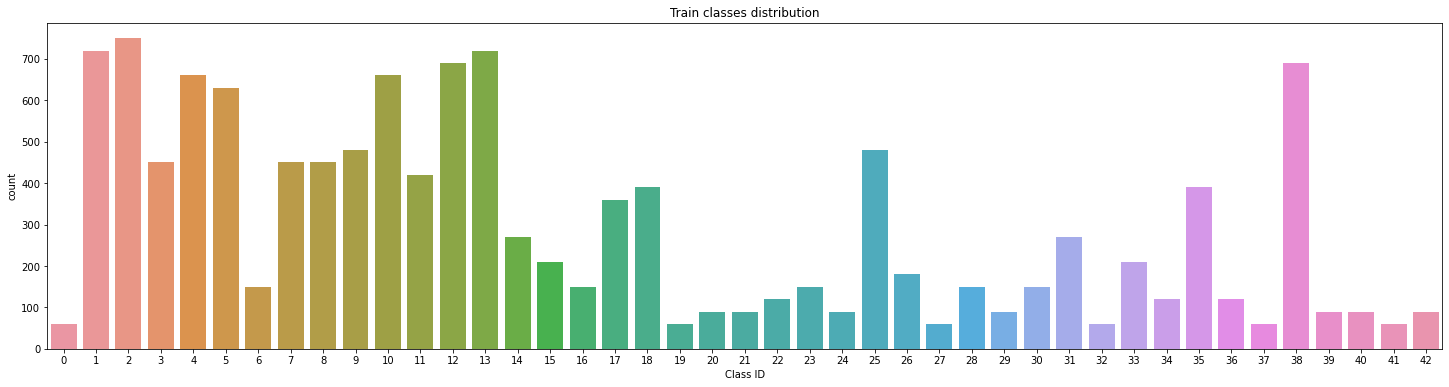

In [21]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(25, 6))
axs.set_title('Train classes distribution')
axs.set_xlabel('Class')
axs.set_ylabel('Count')
sns.countplot(testDf.ClassId)
axs.set_xlabel('Class ID');